In [1]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt


/Users/joaoandrade/.pyenv/versions/3.12.7/envs/chatbot/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('../data/combined_data.csv')
df['Date'] = pd.to_datetime(df['Date'])


In [3]:
store = df[(df['Store'] == 4) & (df['Dept'] == 5)]

In [5]:
store = store.fillna(0)

18:58:38 - cmdstanpy - INFO - Chain [1] start processing
18:58:38 - cmdstanpy - INFO - Chain [1] done processing
18:58:38 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:58:38 - cmdstanpy - INFO - Chain [1] start processing
18:58:39 - cmdstanpy - INFO - Chain [1] done processing


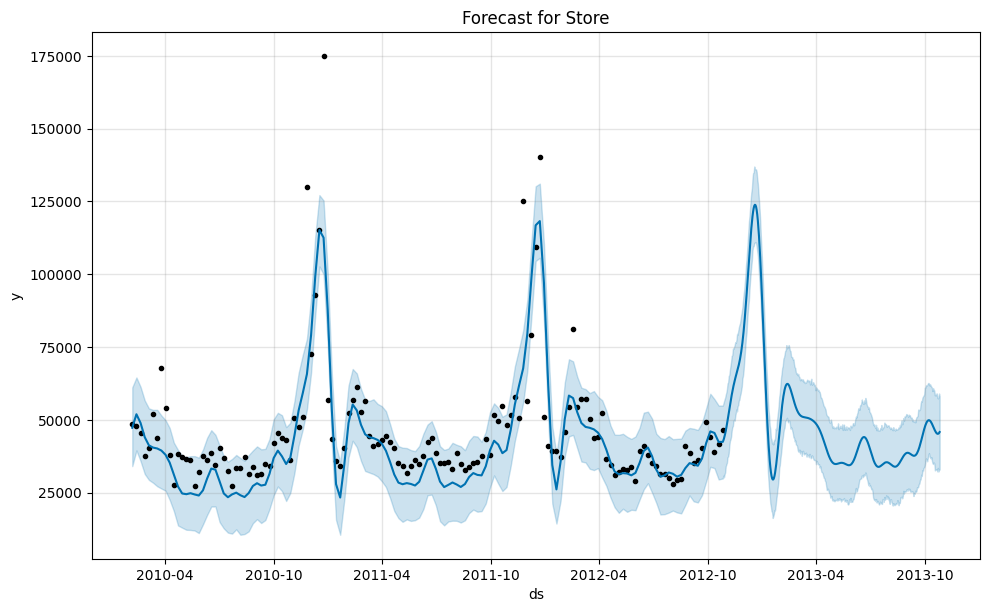

In [6]:
store_data = store[['Date', 'Weekly_Sales', 'Size', 'IsHoliday','Store', 'Dept','MarkDown1','MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']]
store_data.columns = ['ds', 'y', 'Size', 'IsHoliday', 'Store', 'Dept','MarkDown1','MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'] 
regressors = ['Size', 'IsHoliday','Store', 'Dept','MarkDown1','MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

model = Prophet()
for regressor in regressors:
    model.add_regressor(regressor)

model.fit(store_data)

future = model.make_future_dataframe(periods=365)
for regressor in regressors:
    future[regressor] = store_data[regressor].iloc[-1]  
forecast = model.predict(future)

fig1 = model.plot(forecast)
plt.title(f"Forecast for Store")
plt.show()